# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

import warnings

from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# concatenating train and test datasets.
train = pd.read_csv("haus_price_train.csv")
test = pd.read_csv("haus_price_test.csv")
df = train.append(test).reset_index().drop('index', axis='columns')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706.000,Unf,0.000,150.000,856.000,GasA,Ex,Y,SBrkr,856,854,0,1710,1.000,0.000,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2.000,548.000,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.000
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.000,Unf,0.000,284.000,1262.000,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.000,1.000,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2.000,460.000,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.000
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.000,Unf,0.000,434.000,920.000,GasA,Ex,Y,SBrkr,920,866,0,1786,1.000,0.000,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2.000,608.000,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.000
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216.000,Unf,0.000,540.000,756.000,GasA,Gd,Y,SBrkr,961,756,0,1717,1.000,0.000,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3.000,642.000,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655.000,Unf,0.000,490.000,1145.000,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.000,0.000,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3.000,836.000,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.000


## EDA (Exploratory Data Analysis)

### Exploring Categorical Variables

In [2]:
cat_cols = [col for col in df.columns if df[col].dtypes == 'O']
print('Number of categorical variables: ', len(cat_cols))

Number of categorical variables:  43


In [3]:
def cat_summary(data, categorical_cols, target, number_of_classes=10):
    var_count = 0
    vars_more_classes = list()
    for var in categorical_cols:
        if len(df[var].value_counts()) <= number_of_classes:  # select for number of classes
            print(pd.DataFrame({var: data[var].value_counts(),
                                "Ratio": 100 * data[var].value_counts() / len(data),
                                "TARGET_MEDIAN": data.groupby(var)[target].median()}), end="\n\n\n")
            var_count += 1
        else:
            vars_more_classes.append(data[var].name)
    print('%d categorical variables have been described' % var_count, end="\n\n")
    print('There are', len(vars_more_classes), "variables have more than", number_of_classes, "classes", end="\n\n")
    print('Variable names have more than %d classes:' % number_of_classes, end="\n\n")
    print(vars_more_classes)


cat_summary(df, cat_cols, "SalePrice")

         MSZoning  Ratio  TARGET_MEDIAN
C (all)        25  0.856      74700.000
FV            139  4.762     205950.000
RH             26  0.891     136500.000
RL           2265 77.595     174000.000
RM            460 15.759     120500.000


      Street  Ratio  TARGET_MEDIAN
Grvl      12  0.411     114250.000
Pave    2907 99.589     163000.000


      Alley  Ratio  TARGET_MEDIAN
Grvl    120  4.111     119500.000
Pave     78  2.672     172500.000


     LotShape  Ratio  TARGET_MEDIAN
IR1       968 33.162     189000.000
IR2        76  2.604     221000.000
IR3        16  0.548     203570.000
Reg      1859 63.686     146000.000


     LandContour  Ratio  TARGET_MEDIAN
Bnk          117  4.008     139400.000
HLS          120  4.111     222250.000
Low           60  2.055     190000.000
Lvl         2622 89.825     162900.000


        Utilities  Ratio  TARGET_MEDIAN
AllPub       2916 99.897     163000.000
NoSeWa          1  0.034     137500.000


         LotConfig  Ratio  TARGET_MEDIAN
Corne

In [4]:
# Variables containing more than 10 classes:
for col in ['Neighborhood', 'Exterior1st', 'Exterior2nd']:
    print(df[col].value_counts())

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64


## Exploring Numerical Variables

In [5]:
num_cols = [col for col in df.columns if df[col].dtypes != 'O' and col not in "Id" and col != 'index']
print('Number of numerical variables: ', len(num_cols))

Number of numerical variables:  37


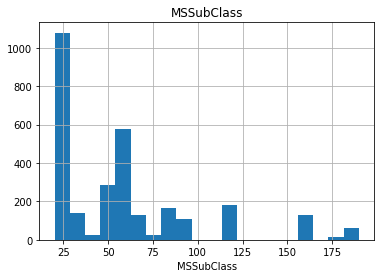

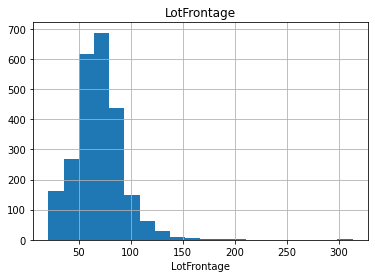

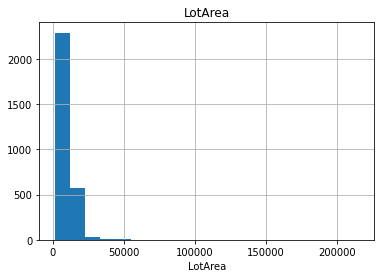

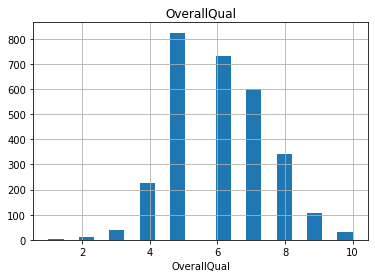

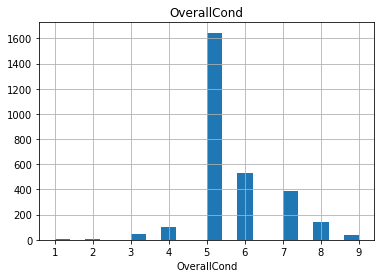

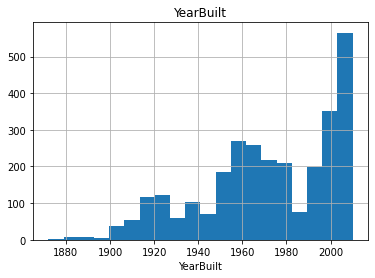

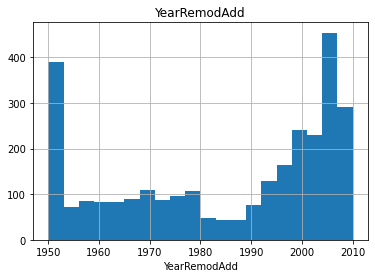

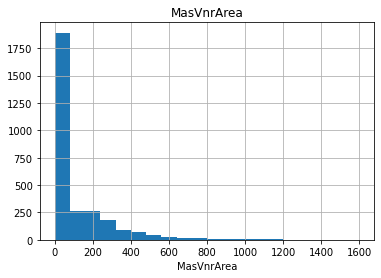

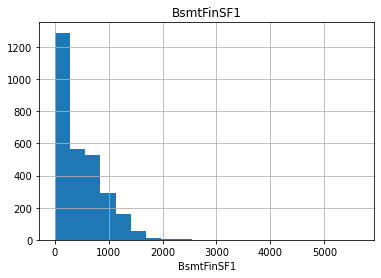

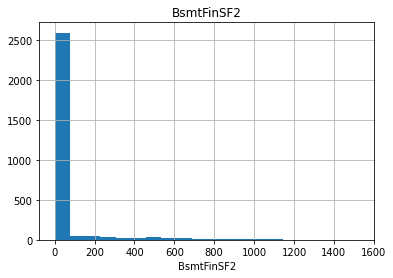

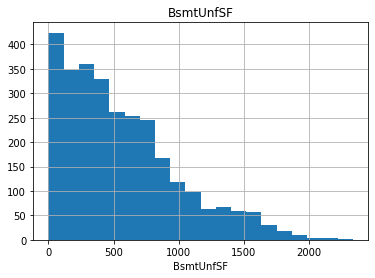

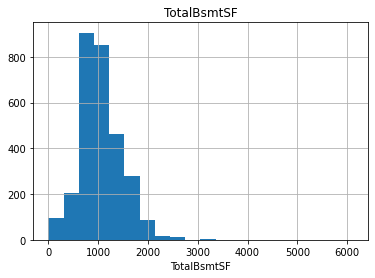

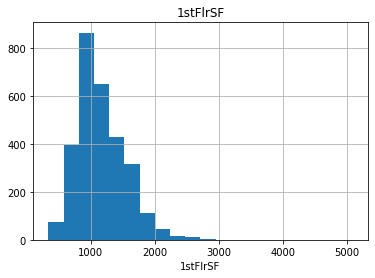

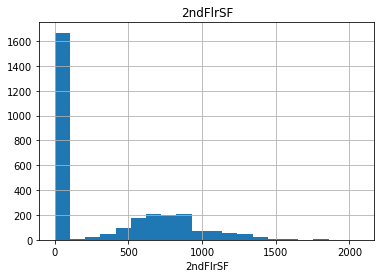

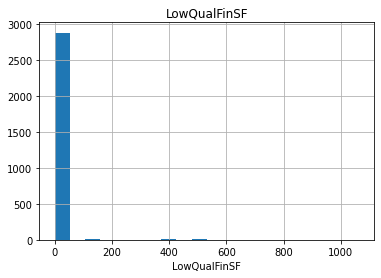

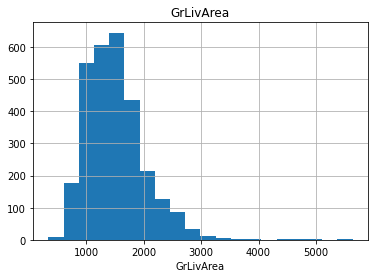

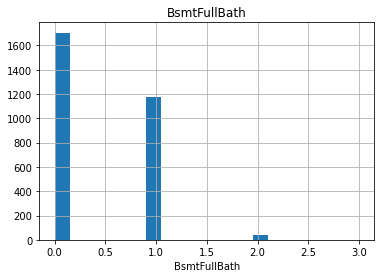

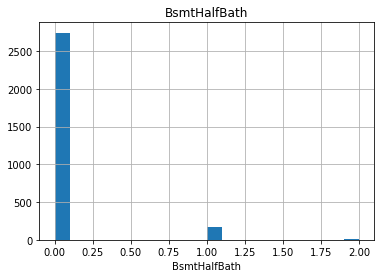

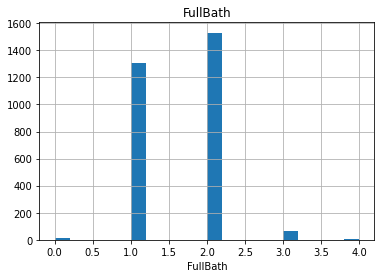

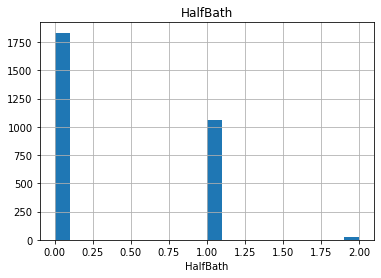

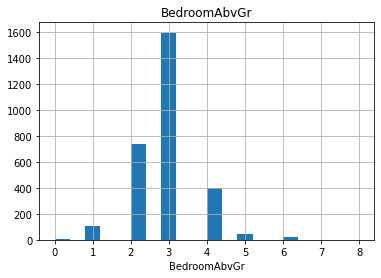

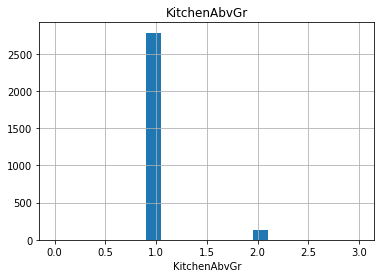

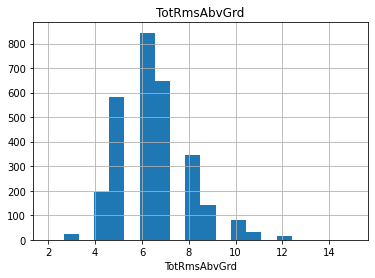

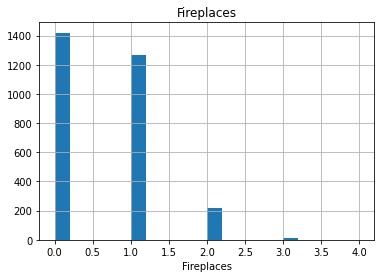

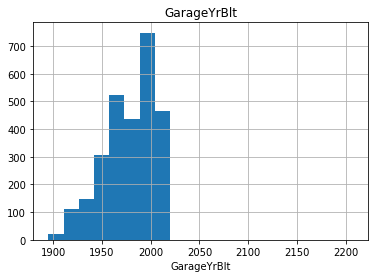

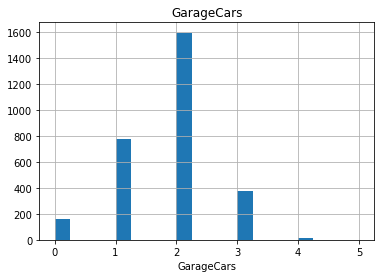

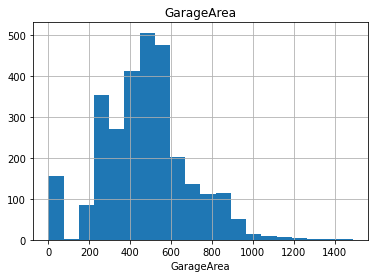

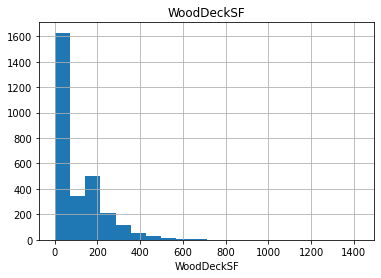

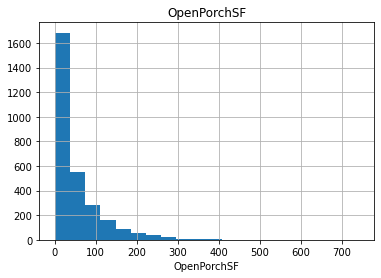

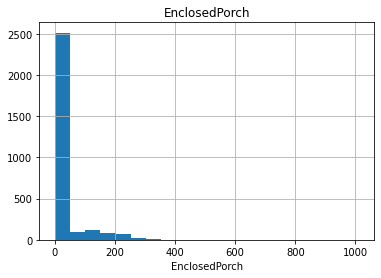

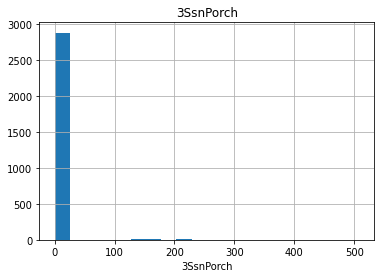

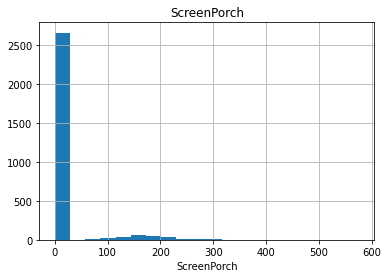

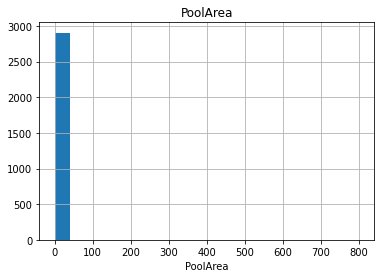

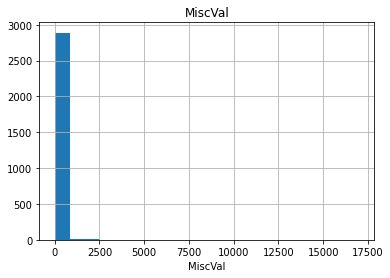

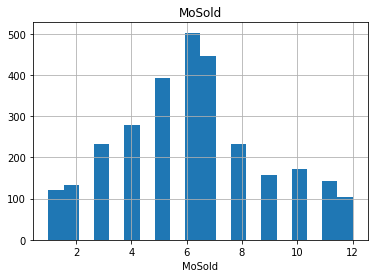

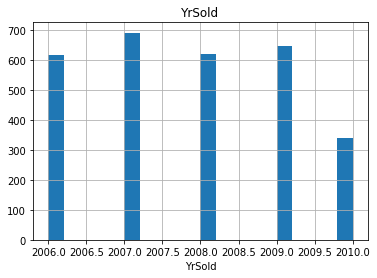

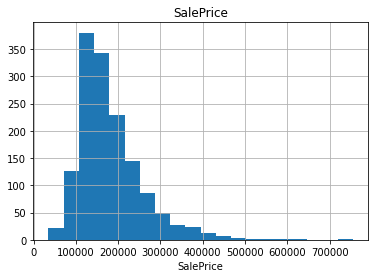

37 variables have been plotted


In [6]:
def hist_for_nums(data, numeric_cols):
    col_counter = 0
    data = data.copy()
    for col in numeric_cols:
        data[col].hist(bins=20)
        plt.xlabel(col)
        plt.title(col)
        plt.show()
        col_counter += 1
    print(col_counter, "variables have been plotted")


hist_for_nums(df, num_cols)

# Exploring Target Variable

In [7]:
df["SalePrice"].describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99])

count     1460.000
mean    180921.196
std      79442.503
min      34900.000
5%       88000.000
10%     106475.000
25%     129975.000
50%     163000.000
75%     214000.000
80%     230000.000
90%     278000.000
95%     326100.000
99%     442567.010
max     755000.000
Name: SalePrice, dtype: float64

In [8]:
# correlations among target variable and independent variables
def find_correlation(dataframe, corr_limit=0.60):
    high_correlations = []
    low_correlations = []
    for col in num_cols:
        if col == "SalePrice":
            pass

        else:
            correlation = dataframe[[col, "SalePrice"]].corr().loc[col, "SalePrice"]
            print(col, correlation)
            if abs(correlation) > corr_limit:
                high_correlations.append(col + ": " + str(correlation))
            else:
                low_correlations.append(col + ": " + str(correlation))
    return low_correlations, high_correlations


low_corrs, high_corrs = find_correlation(df)

MSSubClass -0.08428413512659509
LotFrontage 0.35179909657067737
LotArea 0.2638433538714051
OverallQual 0.7909816005838053
OverallCond -0.07785589404867797
YearBuilt 0.5228973328794967
YearRemodAdd 0.5071009671113866
MasVnrArea 0.47749304709571444
BsmtFinSF1 0.3864198062421535
BsmtFinSF2 -0.011378121450215146
BsmtUnfSF 0.21447910554696928
TotalBsmtSF 0.6135805515591943
1stFlrSF 0.6058521846919153
2ndFlrSF 0.31933380283206736
LowQualFinSF -0.02560613000067955
GrLivArea 0.7086244776126515
BsmtFullBath 0.22712223313149427
BsmtHalfBath -0.01684415429735895
FullBath 0.5606637627484453
HalfBath 0.28410767559478256
BedroomAbvGr 0.16821315430073963
KitchenAbvGr -0.13590737084214105
TotRmsAbvGrd 0.5337231555820284
Fireplaces 0.46692883675152763
GarageYrBlt 0.4863616774878596
GarageCars 0.6404091972583519
GarageArea 0.6234314389183622
WoodDeckSF 0.32441344456812926
OpenPorchSF 0.31585622711605504
EnclosedPorch -0.1285779579259566
3SsnPorch 0.04458366533574838
ScreenPorch 0.11144657114291112
PoolA

# DATA PREPROCESSING & FEATURE ENGINEERING

In [9]:
# Corrections to year variables
def elapsed_years(df, var):

    df[var] = df['YrSold'] - df[var]
    return df

for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    df = elapsed_years(df, var)


# We removed YrSold because it doesn't contain any useful information about data by itself
df.drop('YrSold', axis=1, inplace=True)
num_cols.remove('YrSold')  # we also remove it from numerical variables


# Rare Column Analysing

In [10]:
def rare_analyser(dataframe, target, rare_perc):
    rare_columns = [col for col in df.columns if len(df[col].value_counts()) <= 20
                    and (df[col].value_counts() / len(df) < rare_perc).any(axis=None)]
    for var in rare_columns:
        print(var, ":", len(dataframe[var].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[var].value_counts(),
                            "RATIO": dataframe[var].value_counts() / len(dataframe),
                            "TARGET_MEDIAN": dataframe.groupby(var)[target].median()}), end="\n\n\n")


rare_analyser(df, "SalePrice", 0.01)

MSSubClass : 16
     COUNT  RATIO  TARGET_MEDIAN
20    1079  0.370     159250.000
30     139  0.048      99900.000
40       6  0.002     142500.000
45      18  0.006     107500.000
50     287  0.098     132000.000
60     575  0.197     215200.000
70     128  0.044     156000.000
75      23  0.008     163500.000
80     118  0.040     166500.000
85      48  0.016     140750.000
90     109  0.037     135980.000
120    182  0.062     192000.000
150      1  0.000            NaN
160    128  0.044     146000.000
180     17  0.006      88500.000
190     61  0.021     128250.000


MSZoning : 5
         COUNT  RATIO  TARGET_MEDIAN
C (all)     25  0.009      74700.000
FV         139  0.048     205950.000
RH          26  0.009     136500.000
RL        2265  0.776     174000.000
RM         460  0.158     120500.000


Street : 2
      COUNT  RATIO  TARGET_MEDIAN
Grvl     12  0.004     114250.000
Pave   2907  0.996     163000.000


LotShape : 4
     COUNT  RATIO  TARGET_MEDIAN
IR1    968  0.332     1

         COUNT  RATIO  TARGET_MEDIAN
2Types      23  0.008     159000.000
Attchd    1723  0.590     185000.000
Basment     36  0.012     148000.000
BuiltIn    186  0.064     227500.000
CarPort     15  0.005     108000.000
Detchd     779  0.267     129500.000


GarageCars : 6
       COUNT  RATIO  TARGET_MEDIAN
0.000    157  0.054     100000.000
1.000    776  0.266     128000.000
2.000   1594  0.546     177750.000
3.000    374  0.128     295000.000
4.000     16  0.005     200000.000
5.000      1  0.000            NaN


GarageQual : 5
    COUNT  RATIO  TARGET_MEDIAN
Ex      3  0.001     127500.000
Fa    124  0.042     115000.000
Gd     24  0.008     209115.000
Po      5  0.002      96500.000
TA   2604  0.892     170000.000


GarageCond : 5
    COUNT  RATIO  TARGET_MEDIAN
Ex      3  0.001     124000.000
Fa     74  0.025     114504.000
Gd     15  0.005     148000.000
Po     14  0.005     108000.000
TA   2654  0.909     170000.000


PoolArea : 14
     COUNT  RATIO  TARGET_MEDIAN
0     2906  

In [11]:
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()
    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]
    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])
    return temp_df


df = rare_encoder(df, 0.01)
rare_analyser(df, "SalePrice", 0.01)

MSSubClass : 16
     COUNT  RATIO  TARGET_MEDIAN
20    1079  0.370     159250.000
30     139  0.048      99900.000
40       6  0.002     142500.000
45      18  0.006     107500.000
50     287  0.098     132000.000
60     575  0.197     215200.000
70     128  0.044     156000.000
75      23  0.008     163500.000
80     118  0.040     166500.000
85      48  0.016     140750.000
90     109  0.037     135980.000
120    182  0.062     192000.000
150      1  0.000            NaN
160    128  0.044     146000.000
180     17  0.006      88500.000
190     61  0.021     128250.000


Street : 2
      COUNT  RATIO  TARGET_MEDIAN
Pave   2907  0.996     163000.000
Rare     12  0.004     114250.000


LotShape : 4
      COUNT  RATIO  TARGET_MEDIAN
IR1     968  0.332     189000.000
IR2      76  0.026     221000.000
Rare     16  0.005     203570.000
Reg    1859  0.637     146000.000


Utilities : 2
        COUNT  RATIO  TARGET_MEDIAN
AllPub   2916  0.999     163000.000
Rare        1  0.000     137500.000

In [12]:
drop_list = ["Street", "Utilities", "LandSlope", "PoolQC", "MiscFeature"]
cat_cols = [col for col in df.columns if df[col].dtypes == 'O'
            and col not in drop_list]

for col in drop_list:
    df.drop(col, axis=1, inplace=True)

rare_analyser(df, "SalePrice", 0.01)

MSSubClass : 16
     COUNT  RATIO  TARGET_MEDIAN
20    1079  0.370     159250.000
30     139  0.048      99900.000
40       6  0.002     142500.000
45      18  0.006     107500.000
50     287  0.098     132000.000
60     575  0.197     215200.000
70     128  0.044     156000.000
75      23  0.008     163500.000
80     118  0.040     166500.000
85      48  0.016     140750.000
90     109  0.037     135980.000
120    182  0.062     192000.000
150      1  0.000            NaN
160    128  0.044     146000.000
180     17  0.006      88500.000
190     61  0.021     128250.000


LotShape : 4
      COUNT  RATIO  TARGET_MEDIAN
IR1     968  0.332     189000.000
IR2      76  0.026     221000.000
Rare     16  0.005     203570.000
Reg    1859  0.637     146000.000


LotConfig : 5
         COUNT  RATIO  TARGET_MEDIAN
Corner     511  0.175     160000.000
CulDSac    176  0.060     199262.000
FR2         85  0.029     165000.000
Inside    2133  0.731     159697.500
Rare        14  0.005     195450.000


# ENCODING

In [13]:
def one_hot_encoder(dataframe, categorical_cols, nan_as_category=True):
    original_columns = list(dataframe.columns)
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, dummy_na=nan_as_category, drop_first=True)
    new_columns = [c for c in dataframe.columns if c not in original_columns]
    return dataframe, new_columns


df, new_cols_ohe = one_hot_encoder(df, cat_cols)
cat_summary(df, new_cols_ohe, "SalePrice")

   MSZoning_RL  Ratio  TARGET_MEDIAN
0          654 22.405     130000.000
1         2265 77.595     174000.000


   MSZoning_RM  Ratio  TARGET_MEDIAN
0         2459 84.241     174700.000
1          460 15.759     120500.000


   MSZoning_Rare  Ratio  TARGET_MEDIAN
0           2868 98.253     164600.000
1             51  1.747     107500.000


   MSZoning_nan  Ratio  TARGET_MEDIAN
0          2915 99.863     163000.000
1             4  0.137            NaN


   Alley_Pave  Ratio  TARGET_MEDIAN
0        2841 97.328     162500.000
1          78  2.672     172500.000


   Alley_nan  Ratio  TARGET_MEDIAN
0        198  6.783     140000.000
1       2721 93.217     165000.000


   LotShape_IR2  Ratio  TARGET_MEDIAN
0          2843 97.396     161000.000
1            76  2.604     221000.000


   LotShape_Rare  Ratio  TARGET_MEDIAN
0           2903 99.452     162900.000
1             16  0.548     203570.000


   LotShape_Reg  Ratio  TARGET_MEDIAN
0          1060 36.314     190000.000
1          

   Exterior2nd_VinylSd  Ratio  TARGET_MEDIAN
0                 1905 65.262     145125.000
1                 1014 34.738     200070.500


   Exterior2nd_Wd Sdng  Ratio  TARGET_MEDIAN
0                 2528 86.605     170000.000
1                  391 13.395     138000.000


   Exterior2nd_Wd Shng  Ratio  TARGET_MEDIAN
0                 2838 97.225     164000.000
1                   81  2.775     138225.000


   Exterior2nd_nan  Ratio  TARGET_MEDIAN
0             2918 99.966     163000.000
1                1  0.034            NaN


   MasVnrType_None  Ratio  TARGET_MEDIAN
0             1177 40.322     192750.000
1             1742 59.678     143000.000


   MasVnrType_Rare  Ratio  TARGET_MEDIAN
0             2894 99.144     163500.000
1               25  0.856     139000.000


   MasVnrType_Stone  Ratio  TARGET_MEDIAN
0              2670 91.470     157000.000
1               249  8.530     246839.000


   MasVnrType_nan  Ratio  TARGET_MEDIAN
0            2895 99.178     162700.000
1     

1                 186  6.372     227500.000


   GarageType_Detchd  Ratio  TARGET_MEDIAN
0               2140 73.313     180000.000
1                779 26.687     129500.000


   GarageType_Rare  Ratio  TARGET_MEDIAN
0             2881 98.698     163500.000
1               38  1.302     110000.000


   GarageType_nan  Ratio  TARGET_MEDIAN
0            2762 94.621     167500.000
1             157  5.379     100000.000


   GarageFinish_RFn  Ratio  TARGET_MEDIAN
0              2108 72.217     147750.000
1               811 27.783     190000.000


   GarageFinish_Unf  Ratio  TARGET_MEDIAN
0              1689 57.862     190000.000
1              1230 42.138     135000.000


   GarageFinish_nan  Ratio  TARGET_MEDIAN
0              2760 94.553     167500.000
1               159  5.447     100000.000


   GarageQual_Rare  Ratio  TARGET_MEDIAN
0             2887 98.904     162950.000
1               32  1.096     177450.000


   GarageQual_TA  Ratio  TARGET_MEDIAN
0            315 10.791     

# MISSING VALUES

In [14]:
def missing_values_table(dataframe):
    variables_with_na = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[variables_with_na].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[variables_with_na].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df)
    return variables_with_na


missing_values_table(df)
df = df.apply(lambda x: x.fillna(x.median()), axis=0)
missing_values_table(df)

              n_miss  ratio
SalePrice       1459 49.980
LotFrontage      486 16.650
GarageYrBlt      159  5.450
MasVnrArea        23  0.790
BsmtFullBath       2  0.070
BsmtHalfBath       2  0.070
BsmtFinSF1         1  0.030
BsmtFinSF2         1  0.030
BsmtUnfSF          1  0.030
TotalBsmtSF        1  0.030
GarageCars         1  0.030
GarageArea         1  0.030
Empty DataFrame
Columns: [n_miss, ratio]
Index: []


[]

# OUTLIERS

LotFrontage : 2


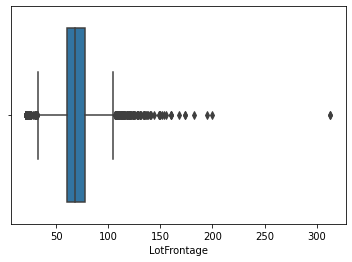

LotArea : 24


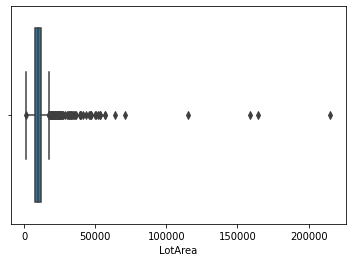

MasVnrArea : 6


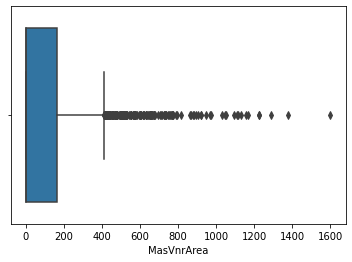

BsmtFinSF1 : 2


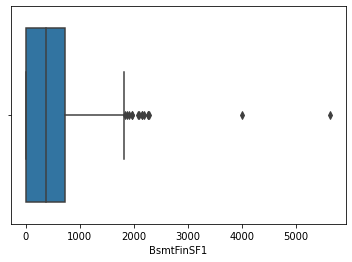

BsmtFinSF2 : 6


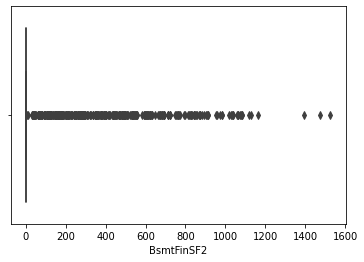

TotalBsmtSF : 2


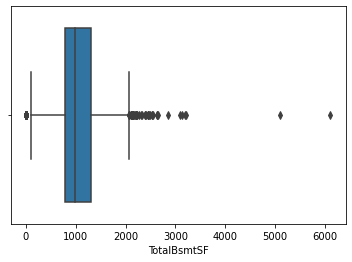

1stFlrSF : 3


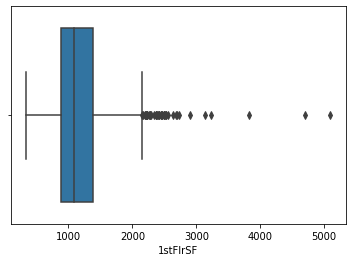

LowQualFinSF : 40


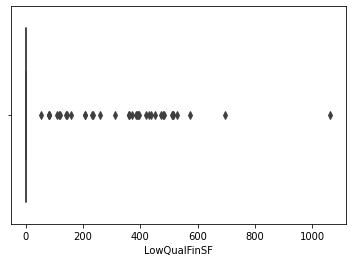

GrLivArea : 2


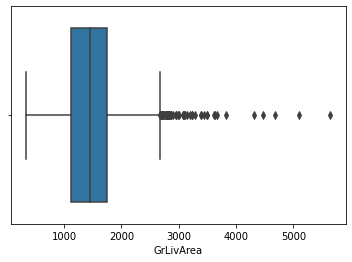

BsmtFullBath : 2


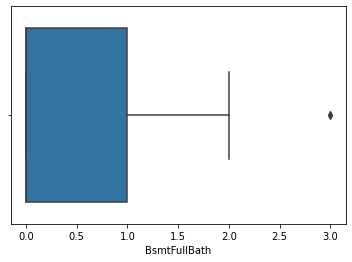

FullBath : 4


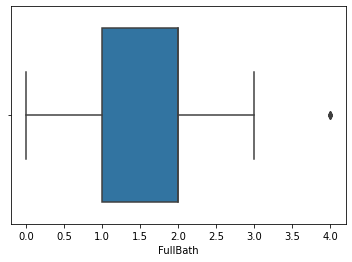

BedroomAbvGr : 1


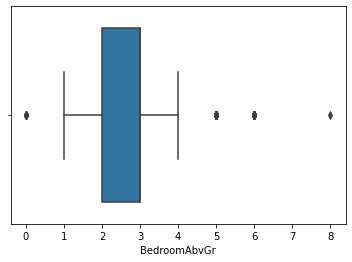

KitchenAbvGr : 134


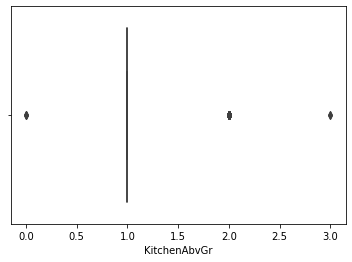

GarageYrBlt : 1


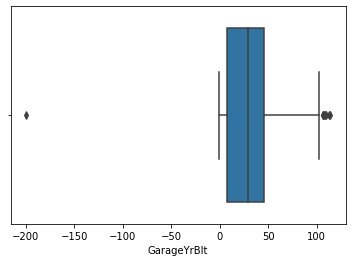

WoodDeckSF : 3


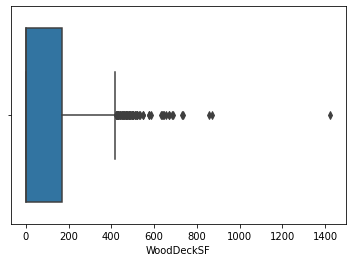

OpenPorchSF : 6


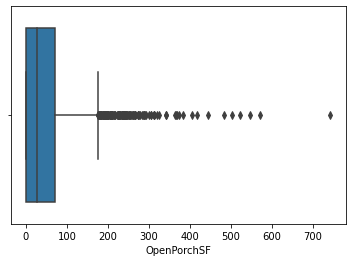

EnclosedPorch : 3


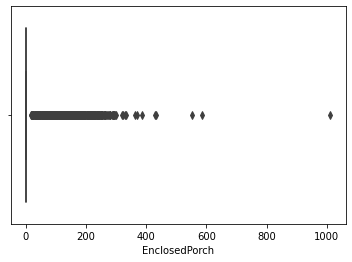

3SsnPorch : 37


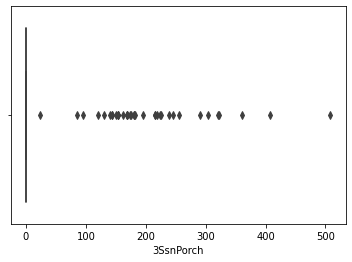

ScreenPorch : 5


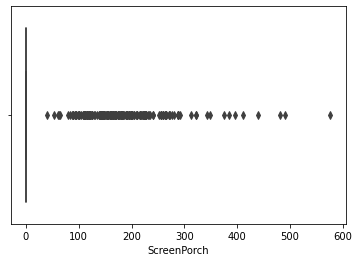

PoolArea : 13


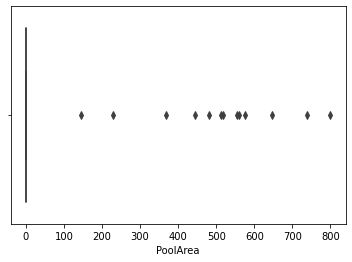

MiscVal : 103


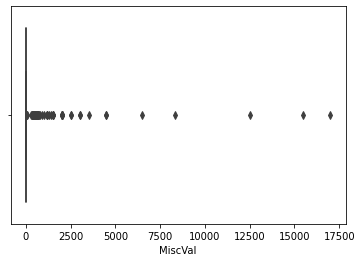

SalePrice : 8


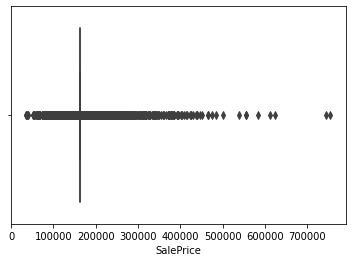

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'TotalBsmtSF',
 '1stFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'GarageYrBlt',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice']

In [15]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.05)
    quartile3 = dataframe[variable].quantile(0.95)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def has_outliers(dataframe, num_col_names, plot=False):
    variable_names = []
    for col in num_col_names:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        if dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].any(axis=None):
            number_of_outliers = dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].shape[0]
            print(col, ":", number_of_outliers)
            variable_names.append(col)
            if plot:
                sns.boxplot(x=dataframe[col])
                plt.show()
    return variable_names


has_outliers(df, num_cols, True)

In [16]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


for col in num_cols:
    replace_with_thresholds(df, col)

has_outliers(df, num_cols)

[]

# STANDARDIZATION

In [17]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,MSZoning_RL,MSZoning_RM,MSZoning_Rare,MSZoning_nan,Alley_Pave,Alley_nan,LotShape_IR2,LotShape_Rare,LotShape_Reg,LotShape_nan,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandContour_nan,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LotConfig_Rare,LotConfig_nan,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Rare,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_nan,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAn,Condition1_Rare,Condition1_nan,Condition2_Rare,Condition2_nan,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BldgType_nan,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Rare,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_nan,RoofStyle_Hip,RoofStyle_Rare,RoofStyle_nan,RoofMatl_Rare,RoofMatl_nan,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Rare,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_nan,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Rare,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_nan,MasVnrType_None,MasVnrType_Rare,MasVnrType_Stone,MasVnrType_nan,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterQual_nan,ExterCond_Gd,ExterCond_Rare,ExterCond_TA,ExterCond_nan,Foundation_CBlock,Foundation_PConc,Foundation_Rare,Foundation_Slab,Foundation_nan,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_nan,BsmtCond_Gd,BsmtCond_Rare,BsmtCond_TA,BsmtCond_nan,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_nan,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_nan,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_nan,Heating_Rare,Heating_nan,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Rare,HeatingQC_TA,HeatingQC_nan,CentralAir_Y,CentralAir_nan,Electrical_FuseF,Electrical_Rare,Electrical_SBrkr,Electrical_nan,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,KitchenQual_nan,Functional_Min2,Functional_Mod,Functional_Rare,Functional_Typ,Functional_nan,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_nan,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_Rare,GarageType_nan,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_nan,GarageQual_Rare,GarageQual_TA,GarageQual_nan,GarageCond_Rare,GarageCond_TA,GarageCond_nan,PavedDrive_P,PavedDrive_Y,PavedDrive_nan,Fence_GdWo,Fence_MnPrv,Fence_Rare,Fence_nan,SaleType_New,SaleType_Rare,SaleType_WD,SaleType_nan,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Rare,SaleCondition_nan
0,1,60,65.000,8450.000,7,5,5.000,5,196.000,706.000,0.000,150.000,856.000,856.000,854.000,0,1710.000,1.000,0.000,2.000,1.000,3,1,8.000,0,5.000,2.000,548.000,0,61.000,0,0,0.000,0,0,2.000,208500.000,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0
1,2,20,80.000,9600.000,6,8,31.000,

In [18]:
like_num = [col for col in df.columns if df[col].dtypes != 'O' and len(df[col].value_counts()) < 20]
cols_need_scale = [col for col in df.columns if col not in new_cols_ohe
                   and col not in "Id"
                   and col not in "SalePrice"
                   and col not in like_num]

df[cols_need_scale].head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
0,65.000,8450.000,5.000,5,196.000,706.000,0.000,150.000,856.000,856.000,854.000,1710.000,5.000,548.000,0,61.000,0,0.000
1,80.000,9600.000,31.000,31,0.000,978.000,0.000,284.000,1262.000,1262.000,0.000,1262.000,31.000,460.000,298,0.000,0,0.000
2,68.000,11250.000,7.000,6,162.000,486.000,0.000,434.000,920.000,920.000,866.000,1786.000,7.000,608.000,0,42.000,0,0.000
3,60.000,9550.000,91.000,36,0.000,216.000,0.000,540.000,756.000,961.000,756.000,1717.000,8.000,642.000,0,35.000,272,0.000
4,84.000,14260.000,8.000,8,350.000,655.000,0.000,490.000,1145.000,1145.000,1053.000,2198.000,8.000,836.000,192,84.000,0,0.000


In [19]:
def robust_scaler(variable):
    var_median = variable.median()
    quartile1 = variable.quantile(0.25)
    quartile3 = variable.quantile(0.75)
    interquantile_range = quartile3 - quartile1
    if int(interquantile_range) == 0:
        quartile1 = variable.quantile(0.05)
        quartile3 = variable.quantile(0.95)
        interquantile_range = quartile3 - quartile1
        z = (variable - var_median) / interquantile_range
        return round(z, 3)
    else:
        z = (variable - var_median) / interquantile_range
    return round(z, 3)


for col in cols_need_scale:
    df[col] = robust_scaler(df[col])


df[cols_need_scale].head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
0,-0.167,-0.245,-0.632,-0.256,1.199,0.460,0.000,-0.542,-0.262,-0.442,1.213,0.431,-0.615,0.266,0.000,0.500,0.000,0.000
1,0.667,0.036,-0.084,0.410,0.000,0.832,0.000,-0.313,0.535,0.352,0.000,-0.295,0.051,-0.078,1.774,-0.371,0.000,0.000
2,0.000,0.439,-0.589,-0.231,0.991,0.160,0.000,-0.056,-0.137,-0.317,1.230,0.554,-0.564,0.500,0.000,0.229,0.000,0.000
3,-0.444,0.024,1.179,0.538,0.000,-0.208,0.000,0.125,-0.459,-0.237,1.074,0.442,-0.538,0.633,0.000,0.129,1.545,0.000
4,0.889,1.175,-0.568,-0.179,2.141,0.391,0.000,0.039,0.306,0.123,1.496,1.221,-0.538,1.391,1.143,0.829,0.000,0.000


In [20]:
df[cols_need_scale].describe().T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,2919.000,0.057,1.148,-2.611,-0.444,0.000,0.556,7.889
LotArea,2919.000,0.114,1.185,-1.992,-0.482,0.000,0.518,6.997
YearBuilt,2919.000,0.031,0.639,-0.758,-0.589,0.000,0.410,2.126
YearRemodAdd,2919.000,0.219,0.536,-0.436,-0.282,0.000,0.718,1.154
MasVnrArea,2919.000,0.618,1.081,0.000,0.000,0.000,1.000,7.125
BsmtFinSF1,2919.000,0.098,0.609,-0.503,-0.503,0.000,0.497,3.842
BsmtFinSF2,2919.000,0.113,0.382,0.000,0.000,0.000,0.000,2.500
BsmtUnfSF,2919.000,0.160,0.751,-0.798,-0.422,0.000,0.577,3.195
TotalBsmtSF,2919.000,0.120,0.845,-1.944,-0.386,0.000,0.614,5.437
1stFlrSF,2919.000,0.150,0.752,-1.462,-0.403,0.000,0.597,4.877


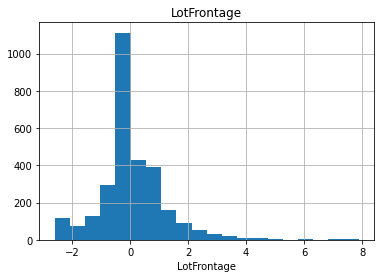

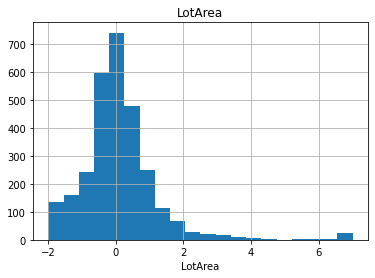

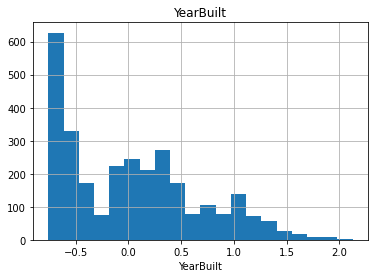

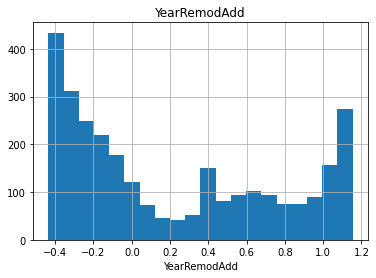

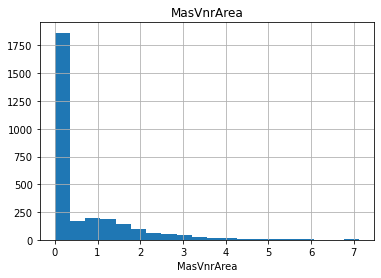

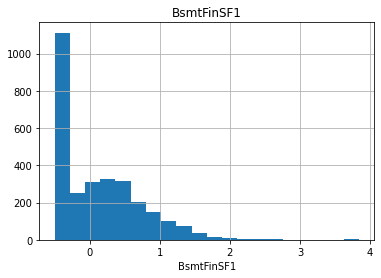

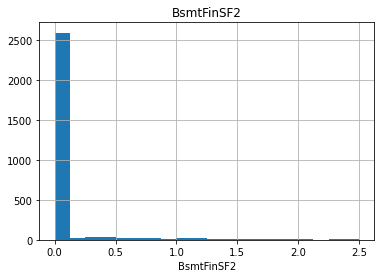

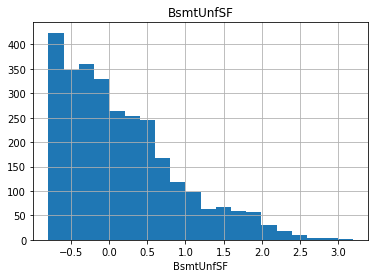

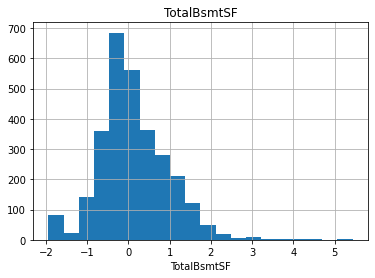

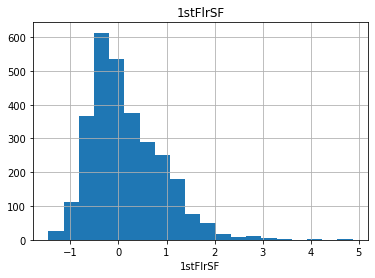

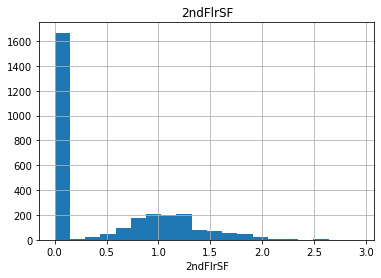

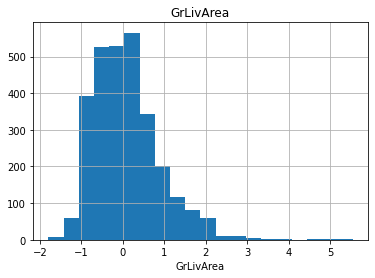

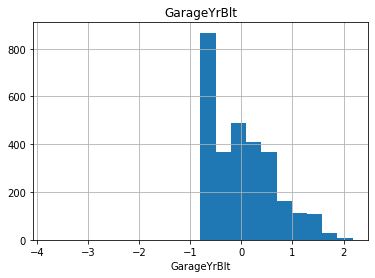

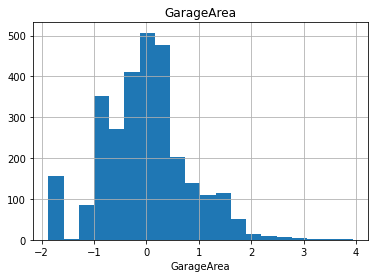

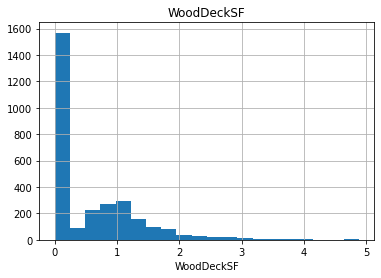

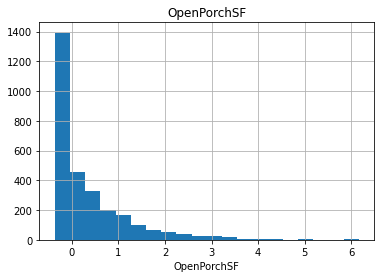

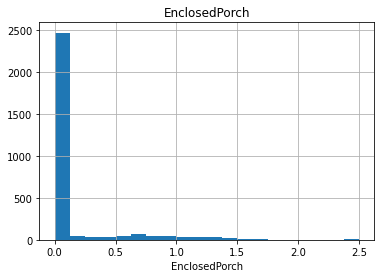

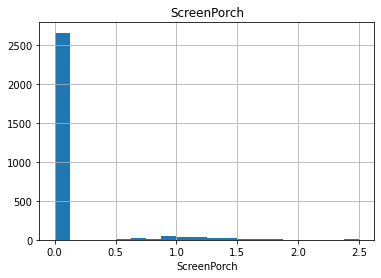

18 variables have been plotted


In [21]:
hist_for_nums(df, cols_need_scale)

In [22]:
# LAST CHECK
missing_values_table(df)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


[]

In [23]:
has_outliers(df, num_cols)

TotalBsmtSF : 2
1stFlrSF : 3
GrLivArea : 2
WoodDeckSF : 3
OpenPorchSF : 6


['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF', 'OpenPorchSF']

# MODELING

In [24]:
train_df = df[df['SalePrice'].notnull()]

In [25]:
len(train_df)

2919

In [26]:
X = train_df.drop('SalePrice', axis=1)
y = train_df[["SalePrice"]]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)

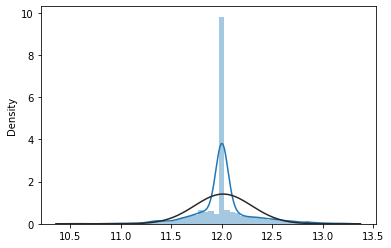

In [27]:
from scipy.stats import norm
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
y_train = np.log1p(y_train)
sns.distplot(y_train , fit=norm);
plt.show()

In [29]:
models = [('LinearRegression', LinearRegression()),
          ('Ridge', Ridge()),
          ('Lasso', Lasso()),
          ('ElasticNet', ElasticNet())]

# evaluate each model in turn
results = []
names = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result = np.sqrt(mean_squared_error(y_test, np.expm1(y_pred)))
    results.append(result)
    names.append(name)
    msg = "%s: %f" % (name, result)
    print(msg)
    print('r2 score -> ',model.score(X_test, np.log1p(y_test)))

LinearRegression: 38594.550927
r2 score ->  0.3984726997060648
Ridge: 38578.330438
r2 score ->  0.3997250118399782
Lasso: 50609.427754
r2 score ->  -0.0004655245572200428
ElasticNet: 50589.070358
r2 score ->  -0.0007993955142813203


def evaluate_model(models):
    # Define lists to track names and results for models
    names = []
    train_rmse_results = []
    test_rmse_results = []
    train_r2_scores = []
    test_r2_scores = []

    print('################ RMSE and R2_score values for test set for the models: ################\n')
    for name, model in models:
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_rmse_result = np.sqrt(mean_squared_error(y_train, y_train_pred))
        test_rmse_result = np.sqrt(mean_squared_error(y_test, y_test_pred))
        train_rmse_results.append(train_rmse_result)
        test_rmse_results.append(test_rmse_result)

        train_r2_score = model.score(X_train, y_train)
        test_r2_score = model.score(X_test, np.log1p(y_test))
        train_r2_scores.append(train_r2_score)
        test_r2_scores.append(test_r2_score)

        names.append(name)
        msg = "%s: %f --> %f" % (name, test_rmse_result, test_r2_score)
        print(msg)

    print('\n################ Train and test results for the model: ################\n')
    data_result = pd.DataFrame({'models': names,
                                'rmse_train': train_rmse_results,
                                'rmse_test': test_rmse_results,
                                'r2_score_train': train_r2_scores,
                                'r2_score_test': test_r2_scores
                                })
    print(data_result)

    # Plot the results
    plt.figure(figsize = (15, 12))
    sns.barplot(x='rmse_test', y='models', data=data_result, color="r")
    plt.xlabel('RMSE values')
    plt.ylabel('Models')
    plt.title('RMSE For Test Set')
    plt.show()


# See the results for base models
base_models = [#('LinearRegression', LinearRegression()),
               ('Ridge', Ridge()),
               ('Lasso', Lasso()),
               ('ElasticNet', ElasticNet())]

evaluate_model(base_models)